In [2]:
# import the necessary modules
import pandas as pd
import numpy as np
import os
#waveform-database:A library of tools for reading, writing, and processing WFDB signals and annotations.
import wfdb 

%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt
mlp.rc("xtick",labelsize=12)
mlp.rc("ytick",labelsize=12)
mlp.rc("axes",labelsize=14)

MAIN_PATH = "/home/anisha/Documents/MajorProject"
DATA_PATH = "/home/anisha/Documents/MajorProject/mit-database"
FIG_PATH="/home/anisha/git-workspace/ECG-Heart"
FIGURE_PATH = os.path.join(FIG_PATH,"saved_figures")
os.makedirs("saved_figures",exist_ok=True)
os.chdir(DATA_PATH)

In [2]:
sample = wfdb.io.rdsamp("101")

In [3]:
print(sample)

(array([[-0.345, -0.16 ],
       [-0.345, -0.16 ],
       [-0.345, -0.16 ],
       ...,
       [-0.295, -0.11 ],
       [-0.29 , -0.11 ],
       [ 0.   ,  0.   ]]), {'fs': 360, 'sig_len': 650000, 'n_sig': 2, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV'], 'sig_name': ['MLII', 'V1'], 'comments': ['75 F 1011 654 x1', 'Diapres']})


In [4]:
sample_file=sample[0]
print(sample_file.shape)
print(type(sample_file))
print(sample_file)

(650000, 2)
<class 'numpy.ndarray'>
[[-0.345 -0.16 ]
 [-0.345 -0.16 ]
 [-0.345 -0.16 ]
 ...
 [-0.295 -0.11 ]
 [-0.29  -0.11 ]
 [ 0.     0.   ]]


In [5]:
sample_MLII = sample_file[:,0]
sample_V5 = sample_file[:,1]
annotation_101_MLII=wfdb.rdann("101", 'atr')

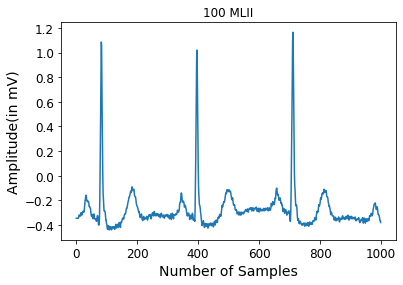

In [6]:
plt.plot(sample_MLII[:1000])
plt.xlabel("Number of Samples")
plt.ylabel("Amplitude(in mV)")
plt.title("100 MLII")
#abc = os.path.join(FIGURE_PATH,"101-MLII")
#plt.savefig("abc",dpi=300, format='png')

plt.savefig("/home/anisha/git-workspace/ECG-Heart/saved_figures/101-MLII.png")

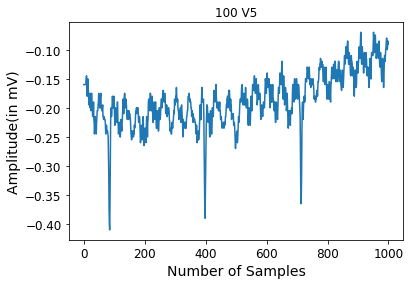

In [7]:
plt.plot(sample_V5[:1000])
plt.xlabel("Number of Samples")
plt.ylabel("Amplitude(in mV)")
plt.title("100 V5")
plt.savefig("/home/anisha/git-workspace/ECG-Heart/saved_figures/100-V5.png")

In [8]:
records = np.loadtxt(os.path.join(DATA_PATH,"RECORDS"), dtype=str)

In [9]:
print(records)
print(len(records))

['100' '101' '102' '103' '104' '105' '106' '107' '108' '109' '111' '112'
 '113' '114' '115' '116' '117' '118' '119' '121' '122' '123' '124' '200'
 '201' '202' '203' '205' '207' '208' '209' '210' '212' '213' '214' '215'
 '217' '219' '220' '221' '222' '223' '228' '230' '231' '232' '233' '234']
48


In [10]:
def read_data():
    dataset = []
    for record in records:
        temp = wfdb.rdrecord(record)
        dataset.append(temp.p_signal)
    return dataset

In [11]:
dataset = read_data()

In [12]:
dataset[47]

array([[-0.08 ,  0.135],
       [-0.08 ,  0.135],
       [-0.08 ,  0.135],
       ...,
       [-0.395,  0.075],
       [-0.38 ,  0.08 ],
       [ 0.   ,  0.   ]])

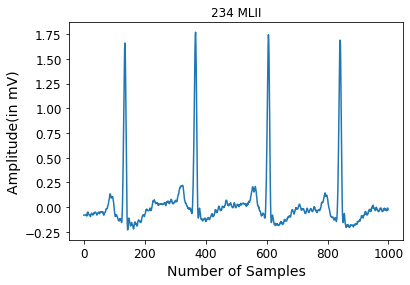

In [13]:
#Plotting the last record MLII data
plt.plot(dataset[47][:1000,0])

plt.xlabel("Number of Samples")
plt.ylabel("Amplitude(in mV)")
plt.title("234 MLII")
plt.savefig("/home/anisha/git-workspace/ECG-Heart/saved_figures/234-MLII.png")

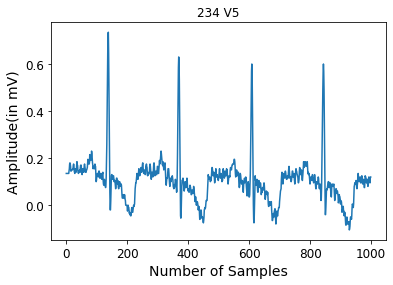

In [14]:
#PLotting the last record V5 data
plt.plot(dataset[47][:1000,1])
plt.xlabel("Number of Samples")
plt.ylabel("Amplitude(in mV)")
plt.title("234 V5")
plt.savefig("/home/anisha/git-workspace/ECG-Heart/saved_figures/234-V5.png")

In [15]:
#Showing all the labels present in our data
wfdb.io.show_ann_labels()

    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     

# Valid and invalid beats

In [16]:
invalid_beat = [
    "[", "!", "]", "x", "(", ")", "p", "t", 
    "u", "`", "'", "^", "|", "~", "+", "s", 
    "T", "*", "D", "=",'"', "@", "B", "a", "J", "S",
    "r", "F", "e", "j", "n", "f", "Q", "?"
]

label_beats=[
    "A", "L", "/", "V", "R", "E", "N"
]

# Beat Segmentation

In [17]:
def classify(symbol):
    if symbol in label_beats:
        return 1
    else:
        return 0
    
def segment(signal_MLII, beat_loc):
    window=180
    count=1
    x=beat_loc-window
    y=beat_loc+window
    samp=signal_MLII[x:y]
    '''for i in ann_Sample[2,-2]:
            x=ann_Sample[i]-window
            y=ann_sample[i]+window
            samp=temp[x:y]
            
    return samp'''
    return samp

all_signals=[]
all_labels=[]
for record in records:
    temp=wfdb.rdrecord(record)
    annot_temp=wfdb.rdann(record, 'atr')
    ann_sample=annot_temp.sample
    ann_symbol=annot_temp.symbol
    fs=temp.fs
    signal=temp.p_signal
    signal_MLII=signal[:,0]
    for i, i_sample in enumerate(ann_sample):
        label_dec=classify(ann_symbol[i])
        segmentation=segment(signal_MLII, i_sample)
        if label_dec==1 and len(segmentation)==360:
            all_signals.append(segmentation)
            all_labels.append(ann_symbol[i])


In [18]:
# vstack Stacks arrays in sequence vertically (row wise).
all_signals_fin=np.vstack(all_signals)

In [19]:
print(all_signals_fin.shape)

(107141, 360)


N


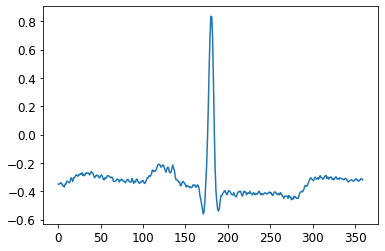

In [20]:
#PLotting
plt.plot(all_signals_fin[187])
print(all_labels[187])

In [21]:
labels_fin=pd.Series(all_labels)

In [23]:
for i, value in enumerate(labels_fin):
    if value=='E':
        print(value)
        print(i)
        break

E
60641


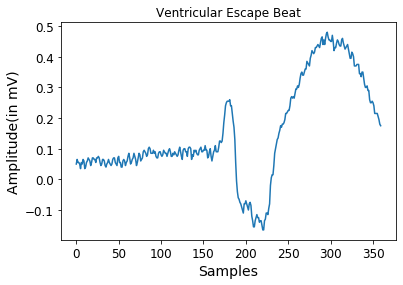

In [26]:
plt.plot(all_signals_fin[60641])
plt.xlabel('Samples')
plt.ylabel('Amplitude(in mV)')
plt.title('Ventricular Escape Beat')
plt.savefig("/home/anisha/Desktop/Ventricular Escape Beat.png")

In [66]:
labels_fin.value_counts()

N    75011
L     8071
R     7255
V     7129
/     7023
A     2546
E      106
dtype: int64

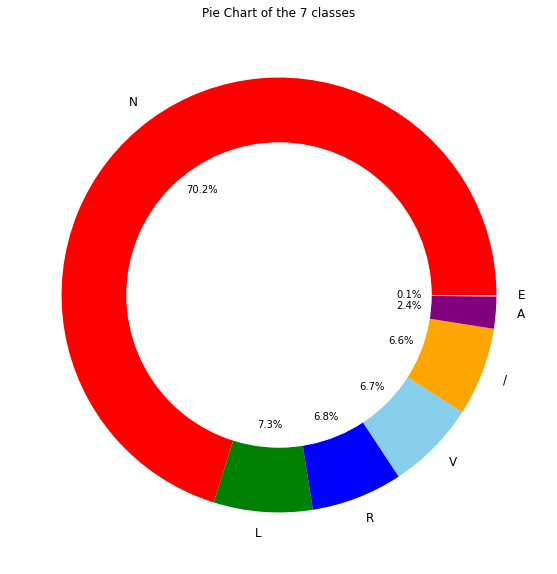

In [3]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie([70.01, 7.33, 6.77, 6.65, 6.56, 2.38, 0.10], labels=['N','L','R','V','/', 'A', 'E'], colors=['red','green','blue','skyblue','orange', 'purple', 'pink'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Pie Chart of the 7 classes")
plt.savefig("/home/anisha/Desktop/ECG-Heart-mate/figures_2/pie.png")
plt.show()


# Resampling

In [77]:
len(all_signals_fin)
labels_array=np.array(all_labels)

In [94]:
df_0=all_signals_fin[labels_fin=='/']
df_1=all_signals_fin[labels_fin=='A']
df_2=all_signals_fin[labels_fin=='E']
df_3=all_signals_fin[labels_fin=='L']
df_4=all_signals_fin[labels_fin=='N']
df_5=all_signals_fin[labels_fin=='R']
df_6=all_signals_fin[labels_fin=='V']
y_df0=labels_array[labels_fin=='/']
print(len(df_0))
print(y_df0)
len(y_df0)

7023
['/' '/' '/' ... '/' '/' '/']


7023

In [79]:
from sklearn.utils import resample

In [97]:
df0_sampled=resample(df_0, replace=True, n_samples=20000, random_state=42)
df1_sampled=resample(df_1, replace=True, n_samples=20000, random_state=42)
df2_sampled=resample(df_2, replace=True, n_samples=20000, random_state=42)
df3_sampled=resample(df_3, replace=True, n_samples=20000, random_state=42)
df4_sampled=resample(df_4, replace=True, n_samples=20000, random_state=42)
df5_sampled=resample(df_5, replace=True, n_samples=20000, random_state=42)
df6_sampled=resample(df_6, replace=True, n_samples=20000, random_state=42)


In [101]:
print(len(df0_sampled))
print(len(df1_sampled))
print(len(df2_sampled))
print(len(df3_sampled))
print(len(df4_sampled))
print(len(df5_sampled))
print(len(df6_sampled))

20000
20000
20000
20000
20000
20000
20000


In [102]:
y_0=['/']*len(df0_sampled)
y_1=['A']*len(df1_sampled)
y_2=['E']*len(df2_sampled)
y_3=['L']*len(df3_sampled)
y_4=['N']*len(df4_sampled)
y_5=['R']*len(df5_sampled)
y_6=['V']*len(df6_sampled)
    

In [108]:
X_final=[]
X_final.extend(df0_sampled)
X_final.extend(df1_sampled)
X_final.extend(df2_sampled)
X_final.extend(df3_sampled)
X_final.extend(df4_sampled)
X_final.extend(df5_sampled)
X_final.extend(df6_sampled)

In [109]:
print(len(X_final))

140000


In [110]:
y_final=[]
y_final.extend(y_0)
y_final.extend(y_1)
y_final.extend(y_2)
y_final.extend(y_3)
y_final.extend(y_4)
y_final.extend(y_5)
y_final.extend(y_6)

In [111]:
len(y_final)

140000

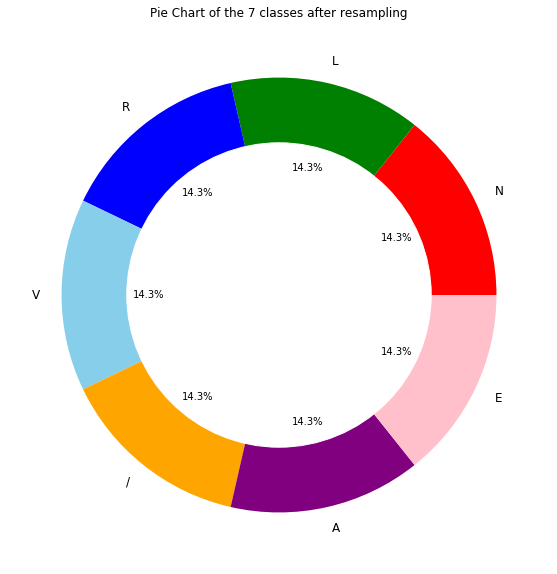

In [5]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie([14.29, 14.29, 14.29, 14.29, 14.29, 14.29, 14.29], labels=['N','L','R','V','/', 'A', 'E'], colors=['red','green','blue','skyblue','orange', 'purple', 'pink'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Pie Chart of the 7 classes after resampling")
plt.savefig("/home/anisha/Desktop/ECG-Heart-mate/figures_2/pie2.png")
plt.show()


# Standarization


In [119]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [120]:
scaled=scaler.fit_transform(X_final)

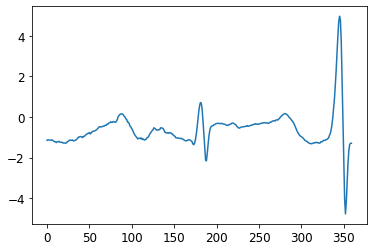

In [122]:
plt.plot(scaled[20000])


In [123]:
scaled[20000]

array([-1.14619174e+00, -1.12135272e+00, -1.12735320e+00, -1.13434817e+00,
       -1.14223672e+00, -1.12989032e+00, -1.12754825e+00, -1.15623039e+00,
       -1.19589131e+00, -1.21444031e+00, -1.22386584e+00, -1.25719298e+00,
       -1.21316701e+00, -1.22346538e+00, -1.19954946e+00, -1.23271881e+00,
       -1.24462608e+00, -1.23487448e+00, -1.24896607e+00, -1.28632548e+00,
       -1.27390184e+00, -1.28347317e+00, -1.29050500e+00, -1.27131374e+00,
       -1.21170850e+00, -1.20149058e+00, -1.15116605e+00, -1.13688717e+00,
       -1.14722125e+00, -1.14402243e+00, -1.12784606e+00, -1.17738555e+00,
       -1.16176952e+00, -1.15893724e+00, -1.12919502e+00, -1.08668305e+00,
       -1.05626360e+00, -9.88744533e-01, -9.87984425e-01, -9.63930896e-01,
       -9.66776790e-01, -9.83293284e-01, -1.01445920e+00, -9.50167918e-01,
       -9.52346931e-01, -9.11435099e-01, -8.68231570e-01, -8.38823017e-01,
       -8.08556468e-01, -8.06233751e-01, -7.60358913e-01, -8.32997408e-01,
       -7.88875866e-01, -

In [124]:
def check_strat(y):
    dummy = pd.DataFrame(y,columns=["Labels"])
    print("Value distribution:\n")
    count = dummy["Labels"].value_counts()
    percent = dummy["Labels"].value_counts(normalize=True).mul(100).round(2)
    print(pd.concat([count,percent],axis=1,keys=["Counts","Percent"]))

In [125]:
check_strat(y_final)

Value distribution:

   Counts  Percent
/   20000    14.29
V   20000    14.29
A   20000    14.29
E   20000    14.29
R   20000    14.29
N   20000    14.29
L   20000    14.29


# Processing data


In [127]:
from sklearn.model_selection import StratifiedShuffleSplit
strad=StratifiedShuffleSplit()

In [128]:
assin_strad=strad.split(scaled, y_final)

In [129]:
train_index, test_index=next(assin_strad)

In [130]:
train_data_scaled=scaled[train_index]


In [132]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

In [137]:
labels_final=lab.fit_transform(y_final)

In [138]:
lab.classes_

array(['/', 'A', 'E', 'L', 'N', 'R', 'V'], dtype='<U1')

In [140]:
train_label=labels_final[train_index]

In [141]:
test_data_scaled=scaled[test_index]

In [34]:
test_data_nonscaled=all_signals_fin[test_index]

In [142]:
test_labels=labels_final[test_index]

In [143]:
check_strat(test_labels)

Value distribution:

   Counts  Percent
6    2000    14.29
5    2000    14.29
4    2000    14.29
3    2000    14.29
2    2000    14.29
1    2000    14.29
0    2000    14.29


In [144]:
check_strat(train_label)

Value distribution:

   Counts  Percent
6   18000    14.29
5   18000    14.29
4   18000    14.29
3   18000    14.29
2   18000    14.29
1   18000    14.29
0   18000    14.29


In [145]:
scaled[123]

array([ 2.03862286e+00,  2.05682363e+00,  2.05715804e+00,  2.07076149e+00,
        2.11964178e+00,  2.08890926e+00,  2.04764269e+00,  2.02594570e+00,
        2.02607087e+00,  2.02720020e+00,  2.03088599e+00,  1.98093059e+00,
        1.88459864e+00,  1.78453048e+00,  1.73880961e+00,  1.63501134e+00,
        1.62650444e+00,  1.56878049e+00,  1.47456250e+00,  1.35427532e+00,
        1.29102111e+00,  1.18635442e+00,  1.16471312e+00,  1.07727061e+00,
        9.86104293e-01,  8.28174127e-01,  7.31156072e-01,  6.58246437e-01,
        6.10770877e-01,  5.23252426e-01,  3.84124405e-01,  2.57495273e-01,
        2.08869718e-01,  1.85981796e-01,  1.63729391e-01,  1.15583219e-01,
        8.12550238e-02,  3.38489539e-02,  3.41827125e-04, -7.82714059e-03,
        5.17099314e-02,  1.99566476e-02, -3.88225937e-02, -8.53509621e-02,
       -1.32364519e-01, -1.10030007e-01, -7.32090040e-02, -1.22906065e-01,
       -1.44616023e-01, -1.66537289e-01, -1.88701102e-01, -1.52515881e-01,
       -1.31530177e-01, -

# SVM Classifier

In [146]:
from sklearn.svm import SVC

In [147]:
cls=SVC(verbose=3)

In [148]:
cls.fit(train_data_scaled, train_label.flatten())

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=3)

In [152]:
print(train_label[1])

3


In [150]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(train_label, cls.predict(train_data_scaled))
print(acc)

0.9859126984126985


In [151]:
cls.predict([train_data_scaled[1]])

array([3])

In [160]:
import pandas as pd
from biosppy.signals import ecg
import biosppy

In [42]:
cls_non=SVC(verbose=3)

In [43]:
cls_non.fit(train_data_scaled, train_label.flatten())

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=3)

In [ ]:
print(train_label[2935])

In [45]:
from sklearn.metrics import accuracy_score
acc_non=accuracy_score(train_label, cls_non.predict(train_data_nonscaled))
print(acc_non)

0.787035500995355


In [46]:
from sklearn.metrics import recall_score
recall=recall_score(train_label, cls.predict(train_data_scaled), average='macro')
print(recall)

0.9237214613377371


In [47]:
recall_non=recall_score(train_label, cls_non.predict(train_data_nonscaled), average='macro')
print(recall_non)

0.3301530526150058


In [48]:
from sklearn.metrics import precision_score
precision=precision_score(train_label, cls.predict(train_data_scaled), average='macro')
print(precision)

0.9553846697026886


In [49]:
precision_non=precision_score(train_label, cls_non.predict(train_data_nonscaled), average='macro')
print(precision_non)

0.5640271842663861


/home/anisha/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
from sklearn.metrics import f1_score
f1=f1_score(train_label, cls.predict(train_data_scaled), average='macro')
print(f1)

0.9384415810932528


In [51]:
f1_non=f1_score(train_label, cls_non.predict(train_data_nonscaled), average='macro')
print(f1_non)

0.38443599473460344


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_label, cls.predict(train_data_scaled))

array([[ 6313,     0,     0,     0,     5,     0,     5],
       [    0,  1529,     0,     6,   742,    10,     4],
       [    0,     0,    89,     1,     5,     0,     1],
       [    0,     2,     4,  7186,    61,     0,    13],
       [    4,    31,     0,    20, 67419,     8,    43],
       [    0,   324,     0,     0,   120,  6084,     3],
       [    7,    15,     3,    38,   218,    13,  6122]])

In [53]:
confusion_matrix(train_label, cls_non.predict(train_data_nonscaled))

array([[ 2462,     0,     0,     0,  3449,    26,   386],
       [    0,    33,     0,     1,  2206,    51,     0],
       [    0,     0,     0,     0,    96,     0,     0],
       [    0,     2,     0,   213,  7032,     7,    12],
       [    1,     2,     0,     2, 67508,     2,    10],
       [    0,    46,     0,     0,  3232,  3252,     1],
       [    4,    79,     0,   998,  2744,   151,  2440]])

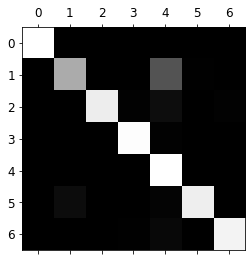

In [54]:
plt.matshow(confusion_matrix(train_label,cls.predict(train_data_scaled),normalize="true"),cmap="gray")
plt.savefig("/home/anisha/git-workspace/ECG-Heart/saved_figures/SVM_Scaled_CM.png")
plt.show()

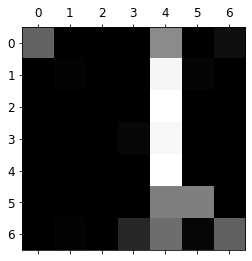

In [55]:
plt.matshow(confusion_matrix(train_label,cls_non.predict(train_data_nonscaled),normalize="true"),cmap="gray")
plt.savefig("/home/anisha/git-workspace/ECG-Heart/saved_figures/SVM_NonScaled_CM.png")
plt.show()

# Logistic Regression


In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
log=LogisticRegression(verbose=3, random_state=42, solver='lbfgs', max_iter=200)
log.fit(train_data_scaled, train_label.flatten())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/anisha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=3,
                   warm_start=False)

In [58]:
log_acc=accuracy_score(train_label, log.predict(train_data_scaled))
print(log_acc)

0.9073594061048441


In [59]:
log_f1=f1_score(train_label, log.predict(train_data_scaled), average='macro')
print(log_f1)

0.6851052038328549


In [60]:
log_recall=recall_score(train_label, log.predict(train_data_scaled), average='macro')
print(log_recall)

0.6533876813789002


In [61]:
log_precision=precision_score(train_label, log.predict(train_data_scaled), average='macro')
print(log_precision)

0.7385670235753932


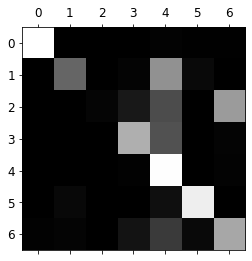

In [62]:
plt.matshow(confusion_matrix(train_label,log.predict(train_data_scaled),normalize="true"),cmap="gray")
plt.savefig("/home/anisha/git-workspace/ECG-Heart/saved_figures/LOG_Scaled_CM.png")
plt.show()

In [63]:
confusion_matrix(train_label, log.predict(train_data_scaled))

array([[ 6166,     2,     0,     7,    78,    26,    44],
       [    0,   890,     0,    43,  1272,    81,     5],
       [    0,     0,     2,     9,    28,     0,    57],
       [    4,    11,     0,  4867,  2245,    10,   129],
       [   68,   114,     5,   745, 65547,   124,   922],
       [    0,   203,     0,     9,   378,  5939,     2],
       [   63,   107,    13,   480,  1427,   224,  4102]])

In [64]:
log.predict([train_data_scaled[556]])

array([4])

In [65]:
print(train_label[556])

4


# KNN Classifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1, weights='distance')

In [67]:
knn.fit(train_data_scaled, train_label.flatten())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

In [68]:
acc_knn=accuracy_score(train_label, knn.predict(train_data_scaled))
print(acc_knn)

1.0


In [69]:
print(knn.predict([train_data_scaled[555]]))
print(train_label[555])

[6]
6


In [70]:
precision_knn=precision_score(train_label, knn.predict(train_data_scaled), average='macro')
print(precision_knn)

1.0


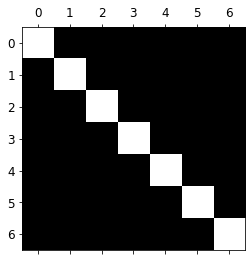

In [71]:
plt.matshow(confusion_matrix(train_label,knn.predict(train_data_scaled),normalize="true"),cmap="gray")
plt.savefig("/home/anisha/git-workspace/ECG-Heart/saved_figures/KNN_Scaled_CM.png")
plt.show()

In [72]:
confusion_matrix(train_label, knn.predict(train_data_scaled))

array([[ 6323,     0,     0,     0,     0,     0,     0],
       [    0,  2291,     0,     0,     0,     0,     0],
       [    0,     0,    96,     0,     0,     0,     0],
       [    0,     0,     0,  7266,     0,     0,     0],
       [    0,     0,     0,     0, 67525,     0,     0],
       [    0,     0,     0,     0,     0,  6531,     0],
       [    0,     0,     0,     0,     0,     0,  6416]])

In [73]:
knn_f1=f1_score(train_label, knn.predict(train_data_scaled), average='macro')
print(knn_f1)

1.0


In [74]:
knn_recall=recall_score(train_label, knn.predict(train_data_scaled), average='macro')
print(knn_recall)

1.0


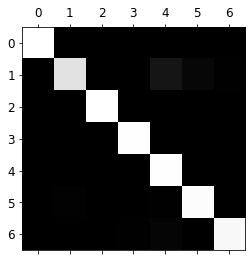

In [75]:
plt.matshow(confusion_matrix(test_labels,knn.predict(test_data_scaled),normalize="true"),cmap="gray")
plt.savefig("/home/anisha/git-workspace/ECG-Heart/saved_figures/KNN_Scaled_CM_test.png")
plt.show()

In [76]:
confusion_matrix(test_labels, knn.predict(test_data_scaled))

array([[ 703,    0,    0,    0,    0,    0,    0],
       [   0,  226,    0,    0,   21,    7,    1],
       [   0,    0,   10,    0,    0,    0,    0],
       [   0,    0,    0,  802,    2,    0,    3],
       [   1,   25,    1,    7, 7457,    6,    6],
       [   0,    6,    0,    0,    4,  715,    1],
       [   0,    1,    0,    4,   15,    0,  693]])

# Saving Trained models

In [77]:
import os
MODEL_PATH = os.path.join(FIG_PATH,"saved_models")
os.makedirs("saved_models",exist_ok=True)

import pickle

# a function to save trained models in pickle object
def save_model(name,model,extension=".pickle"):
    path = os.path.join(MODEL_PATH,name+extension)
    print("Saving Model : ",name)
    file = open(path,"wb")
    pickle.dump(model,file)
    file.close()

In [78]:
#save_model("KNN_CLASSIFIER",knn)
#save_model("LOGISTIC_CLASSIFIER",log)
#save_model("SVM_CLASSIFIER", Cls)

In [82]:
from tensorflow import keras
mlp=keras.Sequential()

In [83]:
mlp.add(keras.layers.Dense(input_shape=train_data_scaled[0].shape, units=len(train_data_scaled)))
mlp.add(keras.layers.Dense(100, activation='relu'))
mlp.add(keras.layers.Dense(64, activation='relu'))
mlp.add(keras.layers.Dense(7, activation='softmax'))

mlp.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
print(mlp.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 96448)             19386048  
_________________________________________________________________
dense_2 (Dense)              (None, 100)               9644900   
_________________________________________________________________
dense_3 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 455       
Total params: 29,037,867
Trainable params: 29,037,867
Non-trainable params: 0
_________________________________________________________________
None


In [96]:
mlp.fit(train_data_scaled, train_label, epochs=25)

Train on 96448 samples
Epoch 1/25
96448/96448 [==============================] - 662s 7ms/sample - loss: 0.2743 - accuracy: 0.9339
Epoch 2/25
96448/96448 [==============================] - 660s 7ms/sample - loss: 0.4477 - accuracy: 0.8597
Epoch 3/25
96448/96448 [==============================] - 669s 7ms/sample - loss: 0.4381 - accuracy: 0.8575
Epoch 4/25
96448/96448 [==============================] - 664s 7ms/sample - loss: 0.5048 - accuracy: 0.8143
Epoch 5/25
96448/96448 [==============================] - 664s 7ms/sample - loss: 0.5704 - accuracy: 0.7839
Epoch 6/25
96448/96448 [==============================] - 664s 7ms/sample - loss: 0.5080 - accuracy: 0.8035
Epoch 7/25
96448/96448 [==============================] - 665s 7ms/sample - loss: 0.5301 - accuracy: 0.7877
Epoch 8/25
96448/96448 [==============================] - 665s 7ms/sample - loss: 0.5567 - accuracy: 0.7802
Epoch 9/25
96448/96448 [==============================] - 670s 7ms/sample - loss: 0.6057 - accuracy: 0.7571
Epoch

In [97]:
mlp_prediction = mlp.predict_classes(train_data_scaled)

In [107]:
print(mlp_prediction[1])

3


In [106]:

print(train_label[1])

6


In [110]:
plt.matshow(confusion_matrix(train_label,mlp.predict(train_data_scaled),normalize="true"),cmap="gray")
plt.savefig("/home/anisha/git-workspace/ECG-Heart/saved_figures/MLP_Scaled_CM.png")
plt.show()

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets